In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline


## Try dictionary learning on abide

In [2]:
from nilearn.datasets import fetch_abide_pcp


# We specify the site and number of subjects we want to download
abide = fetch_abide_pcp(data_dir = 'ABIDE_pcp',derivatives=['func_preproc'],
                        n_subjects=3)

# We look at the available data in this dataset
print(abide.keys())

/Users/irinaknyazeva/opt/anaconda3/envs/brain/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "



Dataset created in /Users/irinaknyazeva/nilearn_data/ABIDE_pcp



 ...done. (1 seconds, 0 min)
/Users/irinaknyazeva/opt/anaconda3/envs/brain/lib/python3.8/site-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Downloaded 95625216 of 104419884 bytes (91.6%,    1.3s remaining) ...done. (16 seconds, 0 min)


Downloaded 105611264 of 107986683 bytes (97.8%,    0.4s remaining) ...done. (19 seconds, 0 min)


Downloaded 101392384 of 110518334 bytes (91.7%,    1.1s remaining)

dict_keys(['description', 'phenotypic', 'func_preproc'])


 ...done. (14 seconds, 0 min)


In [3]:
print(abide.description)

b'ABIDE\n\n\nNotes\n-----\nThe Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously\ncollected resting state functional magnetic resonance imaging datasets\nfrom 539 individuals with ASD and 573 typical controls for the purpose\nof data sharing in the broader scientific community. This grass-root\ninitiative involved 16 international sites, sharing 20 samples yielding\n1112 datasets composed of both MRI data and an extensive array of\nphenotypic information common across nearly all sites (see below).\n\nNote that this is the preprocessed version of ABIDE provided by the\npreprocess connectome projects (PCP).\n\n\nContent\n-------\n    :\'phenotypic\': Behavioral information.\n\n\nReferences\n----------\n\nFor more information about this dataset\'s structure:\nhttp://preprocessed-connectomes-project.github.io\nhttp://www.childmind.org/en/healthy-brain-network/abide/\n\nNielsen, Jared A., et al. "Multisite functional connectivity MRI\nclassification of autism: ABIDE res

In [4]:
print(abide.keys())

dict_keys(['description', 'phenotypic', 'func_preproc'])


In [13]:
# To get the functional dataset, we have to retrieve the variable 'func_preproc'
func = abide.func_preproc

# We can also look at where the data is loaded
print(func[1])

/Users/irinaknyazeva/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050004_func_preproc.nii.gz


In [31]:
import nibabel as nib

In [32]:
img1 = nib.load(func[1])

In [36]:
img1_data = img1.get_fdata()
img1_data.shape

(61, 73, 61, 196)

In [39]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

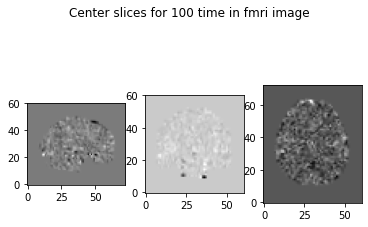

In [42]:
slice_0 = img1_data[30, :, :, 100]
slice_1 = img1_data[:, 35, :, 100]
slice_2 = img1_data[:, :, 35, 100]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for 100 time in fmri image");  


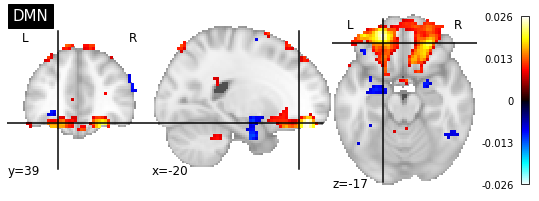

In [14]:
from nilearn import decomposition

# CanICA is nilearn's approach of group ICA. It directly embeds a masker.
canica = decomposition.CanICA(n_components=20, mask_strategy='background')
canica.fit(func)
# Retrieve the components
components = canica.components_

# Use CanICA's masker to project the components back into 3D space
components_img = canica.masker_.inverse_transform(components)

In [29]:
components_img.shape

(61, 73, 61, 20)

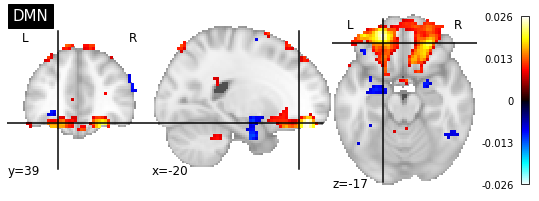

In [46]:
# We visualize the generated atlas
from nilearn import plotting, image

plotting.plot_stat_map(image.index_img(components_img, 9), title='DMN')
plotting.show()

/Users/irinaknyazeva/opt/anaconda3/envs/brain/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/Users/irinaknyazeva/opt/anaconda3/envs/brain/lib/python3.8/site-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


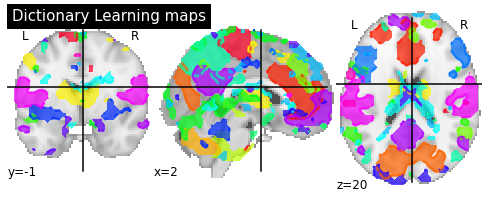

In [47]:
plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='Dictionary Learning maps')

## Atlases region based

In [48]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
harvard = dataset.maps

print('Atlas ROIs are located at: %s' % harvard)


Dataset created in /Users/irinaknyazeva/nilearn_data/fsl



Downloaded 25157632 of 25716861 bytes (97.8%,    0.1s remaining) ...done. (4 seconds, 0 min)
Extracting data from /Users/irinaknyazeva/nilearn_data/fsl/245b1ae3f43e3ea47e2ed9f438694f4a/HarvardOxford.tgz...

Atlas ROIs are located at: /Users/irinaknyazeva/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


.. done.


In [52]:
har = nib.load(harvard)

In [57]:
har_data = har.get_fdata()

In [59]:
np.unique(har_data)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48.])

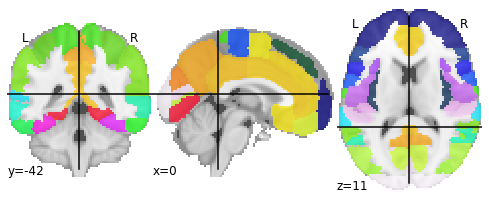

In [60]:
plotting.plot_roi(harvard)

In [66]:
dataset.labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

In [75]:
atlas_schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7)

 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


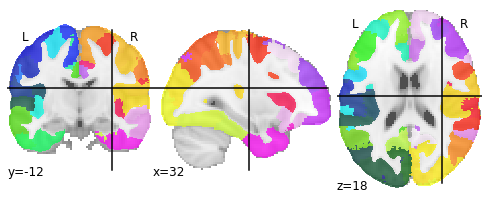

In [76]:
plotting.plot_roi(atlas_schaefer.maps)

In [77]:
print(atlas_schaefer.labels)

[b'7Networks_LH_Vis_1' b'7Networks_LH_Vis_2' b'7Networks_LH_Vis_3'
 b'7Networks_LH_Vis_4' b'7Networks_LH_Vis_5' b'7Networks_LH_Vis_6'
 b'7Networks_LH_Vis_7' b'7Networks_LH_Vis_8' b'7Networks_LH_Vis_9'
 b'7Networks_LH_SomMot_1' b'7Networks_LH_SomMot_2'
 b'7Networks_LH_SomMot_3' b'7Networks_LH_SomMot_4'
 b'7Networks_LH_SomMot_5' b'7Networks_LH_SomMot_6'
 b'7Networks_LH_DorsAttn_Post_1' b'7Networks_LH_DorsAttn_Post_2'
 b'7Networks_LH_DorsAttn_Post_3' b'7Networks_LH_DorsAttn_Post_4'
 b'7Networks_LH_DorsAttn_Post_5' b'7Networks_LH_DorsAttn_Post_6'
 b'7Networks_LH_DorsAttn_PrCv_1' b'7Networks_LH_DorsAttn_FEF_1'
 b'7Networks_LH_SalVentAttn_ParOper_1'
 b'7Networks_LH_SalVentAttn_FrOperIns_1'
 b'7Networks_LH_SalVentAttn_FrOperIns_2'
 b'7Networks_LH_SalVentAttn_PFCl_1' b'7Networks_LH_SalVentAttn_Med_1'
 b'7Networks_LH_SalVentAttn_Med_2' b'7Networks_LH_SalVentAttn_Med_3'
 b'7Networks_LH_Limbic_OFC_1' b'7Networks_LH_Limbic_TempPole_1'
 b'7Networks_LH_Limbic_TempPole_2' b'7Networks_LH_Cont_Par_1'
 

In [78]:
harvard_oxford = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')

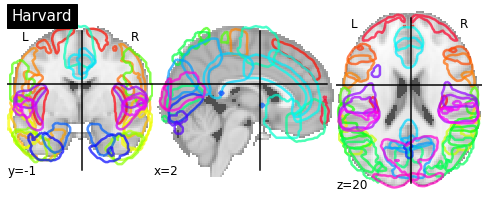

In [80]:
plotting.plot_prob_atlas(harvard_oxford.maps, title='Harvard')

In [82]:
len(harvard_oxford.labels)

49

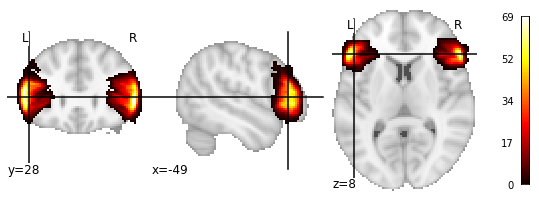

In [85]:
plotting.plot_stat_map(image.index_img(harvard_oxford.maps, 4))

In [88]:
seitzman_atlas = datasets.fetch_coords_seitzman_2018(ordered_regions=True)

/Users/irinaknyazeva/opt/anaconda3/envs/brain/lib/python3.8/site-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [91]:
msdl_atlas = datasets.fetch_atlas_msdl()


Dataset created in /Users/irinaknyazeva/nilearn_data/msdl_atlas



 ...done. (1 seconds, 0 min)
Extracting data from /Users/irinaknyazeva/nilearn_data/msdl_atlas/8eaecb9e05c478f565847000d9902a25/MSDL_rois.zip..... done.


In [96]:
len(msdl_atlas.labels)

39

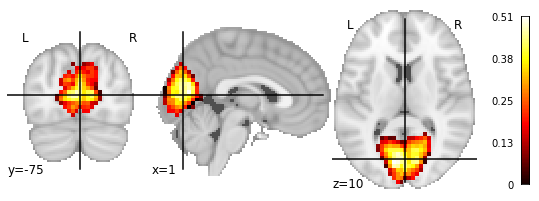

In [95]:
plotting.plot_stat_map(image.index_img(msdl_atlas.maps, 2))

In [98]:
altlas_aal = datasets.fetch_atlas_aal()


Dataset created in /Users/irinaknyazeva/nilearn_data/aal_SPM12



 ...done. (2 seconds, 0 min)
Extracting data from /Users/irinaknyazeva/nilearn_data/aal_SPM12/9845813e2300e5b614a9dd2713e13445/aal_for_SPM12.tar.gz..... done.


In [100]:
len(altlas_aal.labels)

116

In [102]:
range(116)

range(0, 116)

In [104]:
list(zip(altlas_aal.labels, range(116)))

[('Precentral_L', 0),
 ('Precentral_R', 1),
 ('Frontal_Sup_L', 2),
 ('Frontal_Sup_R', 3),
 ('Frontal_Sup_Orb_L', 4),
 ('Frontal_Sup_Orb_R', 5),
 ('Frontal_Mid_L', 6),
 ('Frontal_Mid_R', 7),
 ('Frontal_Mid_Orb_L', 8),
 ('Frontal_Mid_Orb_R', 9),
 ('Frontal_Inf_Oper_L', 10),
 ('Frontal_Inf_Oper_R', 11),
 ('Frontal_Inf_Tri_L', 12),
 ('Frontal_Inf_Tri_R', 13),
 ('Frontal_Inf_Orb_L', 14),
 ('Frontal_Inf_Orb_R', 15),
 ('Rolandic_Oper_L', 16),
 ('Rolandic_Oper_R', 17),
 ('Supp_Motor_Area_L', 18),
 ('Supp_Motor_Area_R', 19),
 ('Olfactory_L', 20),
 ('Olfactory_R', 21),
 ('Frontal_Sup_Medial_L', 22),
 ('Frontal_Sup_Medial_R', 23),
 ('Frontal_Med_Orb_L', 24),
 ('Frontal_Med_Orb_R', 25),
 ('Rectus_L', 26),
 ('Rectus_R', 27),
 ('Insula_L', 28),
 ('Insula_R', 29),
 ('Cingulum_Ant_L', 30),
 ('Cingulum_Ant_R', 31),
 ('Cingulum_Mid_L', 32),
 ('Cingulum_Mid_R', 33),
 ('Cingulum_Post_L', 34),
 ('Cingulum_Post_R', 35),
 ('Hippocampus_L', 36),
 ('Hippocampus_R', 37),
 ('ParaHippocampal_L', 38),
 ('ParaHippo

In [107]:
#thalamus_nodes = image.index_img(altlas_aal.maps, [76,77])

In [106]:
altlas_aal.maps

'/Users/irinaknyazeva/nilearn_data/aal_SPM12/aal/atlas/AAL.nii'

In [109]:
aal = nib.load(altlas_aal.maps)

In [114]:
np.unique(aal.get_fdata())

array([   0., 2001., 2002., 2101., 2102., 2111., 2112., 2201., 2202.,
       2211., 2212., 2301., 2302., 2311., 2312., 2321., 2322., 2331.,
       2332., 2401., 2402., 2501., 2502., 2601., 2602., 2611., 2612.,
       2701., 2702., 3001., 3002., 4001., 4002., 4011., 4012., 4021.,
       4022., 4101., 4102., 4111., 4112., 4201., 4202., 5001., 5002.,
       5011., 5012., 5021., 5022., 5101., 5102., 5201., 5202., 5301.,
       5302., 5401., 5402., 6001., 6002., 6101., 6102., 6201., 6202.,
       6211., 6212., 6221., 6222., 6301., 6302., 6401., 6402., 7001.,
       7002., 7011., 7012., 7021., 7022., 7101., 7102., 8101., 8102.,
       8111., 8112., 8121., 8122., 8201., 8202., 8211., 8212., 8301.,
       8302., 9001., 9002., 9011., 9012., 9021., 9022., 9031., 9032.,
       9041., 9042., 9051., 9052., 9061., 9062., 9071., 9072., 9081.,
       9082., 9100., 9110., 9120., 9130., 9140., 9150., 9160., 9170.])

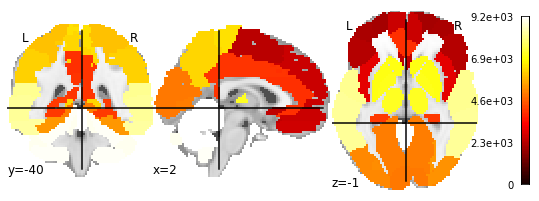

In [115]:
plotting.plot_stat_map(altlas_aal.maps)

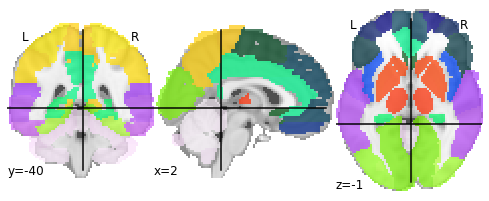

In [116]:
plotting.plot_roi(altlas_aal.maps)

In [127]:
image.index_img(msdl_atlas.maps, 2).get_fdata().shape

(40, 48, 35)

http://nilearn.github.io/auto_examples/03_connectivity/plot_sphere_based_connectome.html#sphx-glr-auto-examples-03-connectivity-plot-sphere-based-connectome-py

In [128]:
https://leslietj.github.io/2020/07/15/PyTorch-Implementation-of-Class-Activation-Map-CAM/

SyntaxError: invalid syntax (<ipython-input-128-5b8d27f727fc>, line 1)

In [ ]:
https://github.com/sarslancs/graph_saliency_maps
    